In [3]:
import matplotlib
from matplotlib import pyplot as plt
plt.style.use(['seaborn'])
plt.rcParams['figure.figsize'] = (15, 5)

# fine-grained grid specification.
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(7, 20)


import torchvision
from torchvision import datasets, transforms
import numpy as np

import json
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# CIFAR10

Files already downloaded and verified


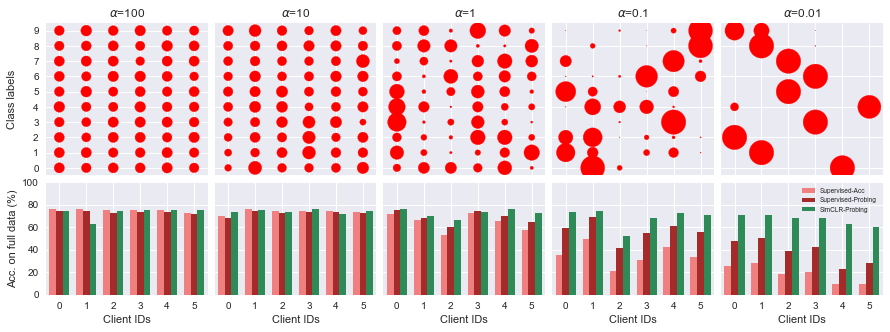

In [27]:
###################### Data Preparation ########################
# class-client bubble distribution
with open('data/noniid.json', 'r') as f:
    dis_data = json.load(f)
dis_keys = ['cifar10/6/100', 'cifar10/6/10', 'cifar10/6/1', 'cifar10/6/0.1', 'cifar10/6/0.01']

# barplot, performance distribution
ssl_accs = np.array([
    np.array([74.0, 62.9, 74.8, 75.0, 75.1, 75.0]),
    np.array([73.1, 75.4, 73.6, 76.1, 72.0, 74.3]),
    np.array([76.3, 70.3, 66.5, 73.5, 76.0, 72.9]),
    np.array([73.8, 74.5, 52.6, 68.5, 72.8, 71.0]),
    np.array([70.7, 70.8, 68.1, 67.8, 62.4, 60.4])
])

supervised_accs = np.array([
    np.array([76.1, 75.7, 75.2, 75.5, 75.4, 72.5]),
    np.array([69.5, 76.2, 74.7, 74.5, 74.3, 73.8]),
    np.array([71.8, 66.2, 52.9, 72.5, 65.7, 57.9]),
    np.array([35.6, 49.5, 21.4, 30.8, 42.4, 33.5]),
    np.array([25.6, 27.8, 18.9, 20.6, 10, 10])
])

supervised_linear_evals = np.array([
    np.array([74.7, 74.3, 73.0, 73.6, 73.3, 72.1]),
    np.array([67.9, 74.7, 73.0, 73.5, 73.3, 72.3]),
    np.array([75.1, 68.5, 60.1, 74.8, 70.1, 64.4]),
    np.array([58.9, 68.6, 41.8, 54.9, 60.9, 56.0]),
    np.array([47.8, 50.8, 39.3, 42.5, 23.0, 28.4])
])


sl_color = 'lightcoral'
ssl_color = 'seagreen'
sl_prob_color = 'brown'

################ Distribution Visualization #################
# get the index-to-class mapping.
dataset = datasets.CIFAR10('data/cifar/', train=True, download=True)

for i, key in enumerate(dis_keys):
    # get the num distribution of different classes
    inds = dis_data[key]
    num_distribution = []
    for c_num in range(6):
        c_key = str(c_num)
        idx_res = np.array([0 for _ in range(10)])
        for idx in inds[c_key]:
            cls = dataset.targets[idx]
            idx_res[cls] += 1
        num_distribution.append(idx_res)
    # draw the plot
    ax = plt.subplot(gs[:4, i*4:(i+1)*4])
    ax.set_xticks(range(6))
    ax.set_xticklabels([])
    ax.set_title(r'$\alpha$='+f"{key.split('/')[-1]}")
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 9.5)
    if i == 0:
        ax.set_ylabel('Class labels', labelpad=16)
        ax.set_yticks(range(10))
    else:
        ax.set_yticklabels([])
        
    # plot the bubble
    a = np.array(num_distribution, dtype=float)
    a /= a.sum(axis=0, keepdims=True)
    
    users, classes = a.shape
    
    xs, ys, ss = [], [], []
    for user in range(users):
        for c in range(classes):
            xs.append(user)
            ys.append(c)
            ss.append(a[user, c] * 600)
                
    ax.scatter(x=xs, y=ys, s=ss, c='red')

############## visualize the barplot ####################
for i in range(len(dis_keys)):
    ax = plt.subplot(gs[4:, i*4:(i+1)*4])
    ax.set_xlabel('Client IDs')
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(0, 100)
    ax.set_xticks(range(6))
    if i == 0:
        ax.set_ylabel('Acc. on full data (%)')
    else:
        ax.set_yticklabels([])
    
    # get the current acc distributions over clients.
    ssls, supers, super_linears = ssl_accs[i], supervised_accs[i], supervised_linear_evals[i]
    width = 0.25
    ax.bar(x=[_ - 3*width/2 for _ in range(6)], height=supers, color=sl_color, width=width, align='edge', label='Supervised-Acc')
    ax.bar(x=[_ for _ in range(6)], height=super_linears, color=sl_prob_color, width=width, align='center', label='Supervised-Probing')
    ax.bar(x=[_ + width/2 for _ in range(6)], height=ssls, color=ssl_color, width=width, align='edge', label='SimCLR-Probing')
    if i == len(dis_keys) - 1:
        ax.legend(loc='upper right',fontsize=6.5)
    
plt.savefig('distribution_cifar10.pdf')

## CIFAR100

Files already downloaded and verified


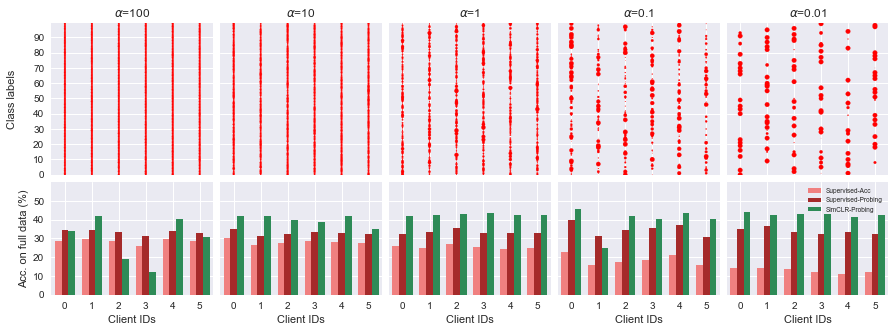

In [41]:
###################### Data Preparation ########################
# class-client bubble distribution
with open('data/noniid.json', 'r') as f:
    dis_data = json.load(f)
dis_keys = ['cifar100/6/100', 'cifar100/6/10', 'cifar100/6/1', 'cifar100/6/0.1', 'cifar100/6/0.01']

# barplot, performance distribution
ssl_accs = np.array([
    np.array([34.0, 41.7, 19.2, 12.4, 40.6, 30.6]),
    np.array([41.8, 41.9, 39.6, 38.9, 41.9, 34.9]),
    np.array([41.8, 42.3, 43.0, 43.5, 42.6, 42.7]),
    np.array([45.5, 24.8, 41.7, 40.6, 43.8, 40.4]),
    np.array([44.0, 42.3, 42.8, 43.2, 41.2, 42.3])
])


supervised_accs = np.array([
    np.array([28.5, 29.6, 28.5, 25.9, 29.8, 28.8]),
    np.array([30.3, 26.7, 27.5, 28.9, 28.3, 27.5]),
    np.array([26.2, 24.9, 27.1, 25.6, 24.4, 24.7]),
    np.array([23.0, 16.0, 17.4, 18.3, 21.1, 16.1]),
    np.array([14.4, 14.5, 13.9, 12.1, 11.2, 12.4])
])


supervised_linear_evals = np.array([
    np.array([34.4, 34.7, 33.4, 31.2, 34.0, 32.7]),
    np.array([35.0, 31.5, 32.5, 33.3, 32.7, 32.6]),
    np.array([32.5, 33.7, 35.3, 32.8, 32.9, 33.0]),
    np.array([39.7, 31.3, 34.6, 35.8, 37.0, 30.9]),
    np.array([35.0, 36.8, 33.7, 32.5, 33.7, 32.4])
])

sl_color = 'lightcoral'
ssl_color = 'seagreen'
sl_prob_color = 'brown'

################ Distribution Visualization #################
# get the index-to-class mapping.
dataset = datasets.CIFAR100('data/cifar100/', train=True, download=True)

for i, key in enumerate(dis_keys):
    # get the num distribution of different classes
    inds = dis_data[key]
    num_distribution = []
    for c_num in range(6):
        c_key = str(c_num)
        idx_res = np.array([0 for _ in range(100)])
        for idx in inds[c_key]:
            cls = dataset.targets[idx]
            idx_res[cls] += 1
        num_distribution.append(idx_res)
    # draw the plot
    ax = plt.subplot(gs[:4, i*4:(i+1)*4])
    ax.set_xticks(range(6))
    ax.set_xticklabels([])
    ax.set_title(r'$\alpha$='+f"{key.split('/')[-1]}")
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 99.5)
    if i == 0:
        ax.set_ylabel('Class labels', labelpad=16)
        ax.set_yticks([10*_ for _ in range(10)])
    else:
        ax.set_yticklabels([])
        
    # plot the bubble
    a = np.array(num_distribution, dtype=float)
    a /= a.sum(axis=0, keepdims=True)
    
    users, classes = a.shape
    
    xs, ys, ss = [], [], []
    for user in range(users):
        for c in range(classes):
            xs.append(user)
            ys.append(c)
            ss.append(a[user, c] * 20)
                
    ax.scatter(x=xs, y=ys, s=ss, c='red')

############## visualize the barplot ####################
for i in range(len(dis_keys)):
    ax = plt.subplot(gs[4:, i*4:(i+1)*4])
    ax.set_xlabel('Client IDs')
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(0, 60)
    ax.set_xticks(range(6))
    ax.set_yticks([10 * _ for _ in range(6)])
    if i == 0:
        ax.set_ylabel('Acc. on full data (%)')
    else:
        ax.set_yticklabels([])
    
    # get the current acc distributions over clients.
    ssls, supers, super_linears = ssl_accs[i], supervised_accs[i], supervised_linear_evals[i]
    width = 0.25
    ax.bar(x=[_ - 3*width/2 for _ in range(6)], height=supers, color=sl_color, width=width, align='edge', label='Supervised-Acc')
    ax.bar(x=[_ for _ in range(6)], height=super_linears, color=sl_prob_color, width=width, align='center', label='Supervised-Probing')
    ax.bar(x=[_ + width/2 for _ in range(6)], height=ssls, color=ssl_color, width=width, align='edge', label='SimCLR-Probing')
    if i == len(dis_keys) - 1:
        ax.legend(loc='upper right',fontsize=6.5)
    
plt.savefig('distribution_cifar100.pdf')

# Tiny-ImageNet

In [ ]:
###################### Data Preparation ########################
# class-client bubble distribution
with open('data/noniid.json', 'r') as f:
    dis_data = json.load(f)
dis_keys = ['cifar100/6/100', 'cifar100/6/1', 'cifar100/6/0.01']

# barplot, performance distribution
ssl_accs = np.array([
    np.array([35.5, 35.0, 35.4, 35.5, 35.6, 35.0]),
    np.array([36.3, 34.7, 35.4, 35.4, 35.6, 35.9]),
    np.array([36.2, 35.6, 34.6, 36.1, 35.3, 35.8])
])

sl_color = 'lightcoral'
ssl_color = 'seagreen'
sl_prob_color = 'brown'

################ Distribution Visualization #################
# get the index-to-class mapping.
dataset = datasets.CIFAR100('data/cifar100/', train=True, download=True)

for i, key in enumerate(dis_keys):
    # get the num distribution of different classes
    inds = dis_data[key]
    num_distribution = []
    for c_num in range(6):
        c_key = str(c_num)
        idx_res = np.array([0 for _ in range(100)])
        for idx in inds[c_key]:
            cls = dataset.targets[idx]
            idx_res[cls] += 1
        num_distribution.append(idx_res)
    # draw the plot
    ax = plt.subplot(gs[:4, i*4:(i+1)*4])
    ax.set_xticks(range(6))
    ax.set_xticklabels([])
    ax.set_title(r'$\alpha$='+f"{key.split('/')[-1]}")
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(-0.5, 99.5)
    if i == 0:
        ax.set_ylabel('Class labels', labelpad=16)
        ax.set_yticks([10*_ for _ in range(10)])
    else:
        ax.set_yticklabels([])
        
    # plot the bubble
    a = np.array(num_distribution, dtype=float)
    a /= a.sum(axis=0, keepdims=True)
    
    users, classes = a.shape
    
    xs, ys, ss = [], [], []
    for user in range(users):
        for c in range(classes):
            xs.append(user)
            ys.append(c)
            ss.append(a[user, c] * 20)
                
    ax.scatter(x=xs, y=ys, s=ss, c='red')

############## visualize the barplot ####################
for i in range(len(dis_keys)):
    ax = plt.subplot(gs[4:, i*4:(i+1)*4])
    ax.set_xlabel('Client IDs')
    ax.set_xlim(-0.5, 5.5)
    ax.set_ylim(0, 60)
    ax.set_xticks(range(6))
    ax.set_yticks([10 * _ for _ in range(6)])
    if i == 0:
        ax.set_ylabel('Acc. on full data (%)')
    else:
        ax.set_yticklabels([])
    
    # get the current acc distributions over clients.
    ssls, supers, super_linears = ssl_accs[i], supervised_accs[i], supervised_linear_evals[i]
    width = 0.25
    ax.bar(x=[_ - 3*width/2 for _ in range(6)], height=supers, color=sl_color, width=width, align='edge', label='Supervised-Acc')
    ax.bar(x=[_ for _ in range(6)], height=super_linears, color=sl_prob_color, width=width, align='center', label='Supervised-Probing')
    ax.bar(x=[_ + width/2 for _ in range(6)], height=ssls, color=ssl_color, width=width, align='edge', label='SimCLR-Probing')
    if i == len(dis_keys) - 1:
        ax.legend(loc='upper right',fontsize=6.5)
    
plt.savefig('distribution_cifar100.pdf')